## Building ANN on Fashion MNIST Dataset

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(42)

In [3]:
df = pd.read_csv(r"Fashion_MNIST\fashion-mnist_train.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(df.shape)

(60000, 785)


In [5]:
# Training on CPU with first 6000 rows only
train_df = df.iloc[:6000]

In [6]:
train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5996,1,0,0,0,0,0,0,0,0,0,...,82,0,0,0,0,0,0,0,0,0
5997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5998,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


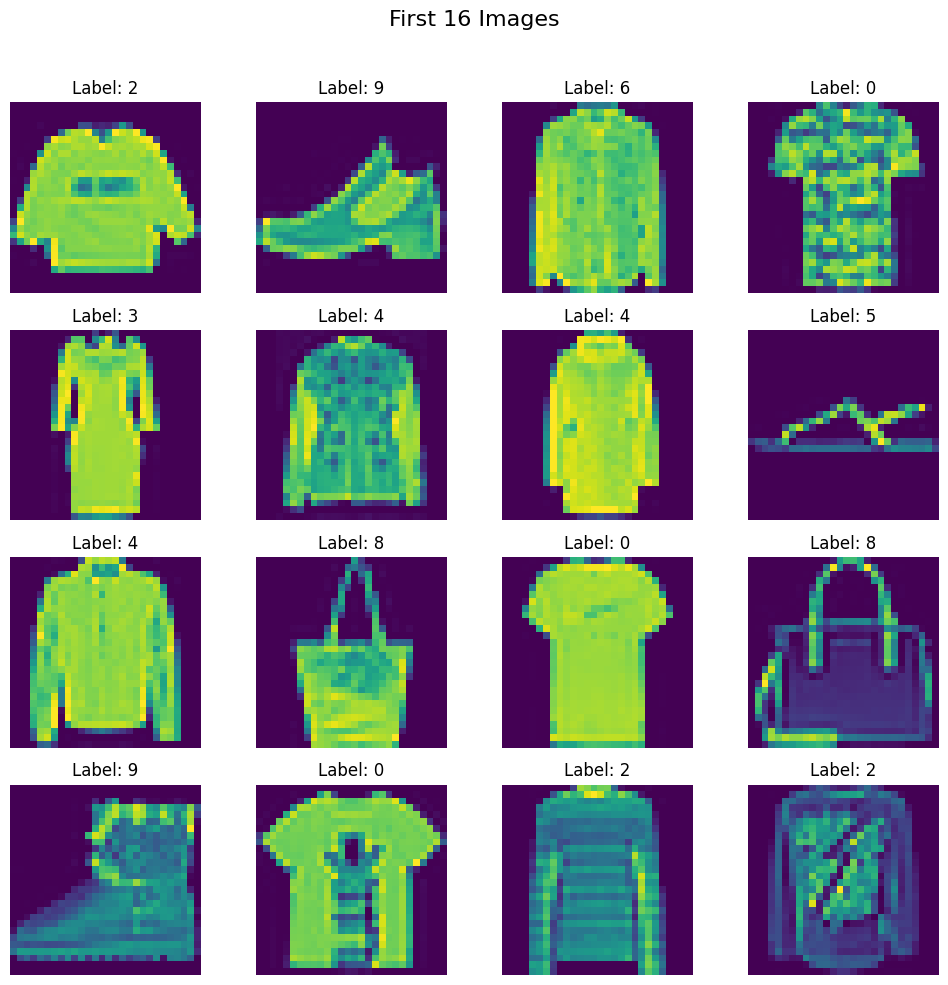

In [7]:
# visualizing first few images

fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 Images", fontsize=16)

for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28) # reshape to 28 x 28
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"Label: {df.iloc[i, 0]}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [8]:
train_df["label"].value_counts()

label
0    630
7    619
6    616
3    613
1    603
5    592
4    586
2    586
9    582
8    573
Name: count, dtype: int64

In [9]:
X = train_df.drop(columns=["label"])
y = train_df[["label"]]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
print("X Train Shape: ", X_train.shape)
print("y Train Shape: ", y_train.shape)
print("X Test Shape: ", X_test.shape)
print("y Test Shape: ", y_test.shape)

X Train Shape:  (4800, 784)
y Train Shape:  (4800, 1)
X Test Shape:  (1200, 784)
y Test Shape:  (1200, 1)


In [12]:
# scaling the feature
# 0 - 255 -> 0 to 1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [13]:
# custom dataset class

class CustomDataset(Dataset):
    def __init__(self, features, target) -> None:
        self.features = torch.tensor(features.values, dtype=torch.float32)
        self.target = torch.tensor(target.values, dtype=torch.long)
    
    def __len__(self) -> int:
        return len(self.features)

    def __getitem__(self, index):
        return self.features[index], self.target[index]

In [14]:
train_data = CustomDataset(X_train, y_train)
test_data = CustomDataset(X_test, y_test)

In [15]:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

In [16]:
# defining NN class

class FashionMNISTNN(nn.Module):
    def __init__(self, n_features) -> None:
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(n_features, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.ReLU(),
            nn.Linear(64, 10),
            # nn.Softmax() #  In Cross Entropy Loss - softmax implemented by default in PyTorch
        )

    def forward(self, x):

        return self.model(x)

In [22]:
learning_rate = 0.01
epochs = 50

In [23]:
model = FashionMNISTNN(X_train.shape[1])

# loss function
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate)


In [24]:
# training loop

for epoch in range(epochs):
    total_epoch_loss = 0
    for batch_features, batch_targets in train_loader:
        # forward pass
        out = model(batch_features)

        # calculate loss
        batch_targets = batch_targets.squeeze(1).long() 
        loss = criterion(out, batch_targets)

        # backpass 
        optimizer.zero_grad()
        loss.backward()
        total_epoch_loss += loss.item()

        # update gradient
        optimizer.step()
    
    # printing average epoch loss
    print(f"Epoch {epoch + 1}/{epochs} - Loss: {total_epoch_loss/len(train_loader)}")

Epoch 1/50 - Loss: 2.243101779619853
Epoch 2/50 - Loss: 2.020630238056183
Epoch 3/50 - Loss: 1.5962013745307921
Epoch 4/50 - Loss: 1.2358599809805553
Epoch 5/50 - Loss: 1.0287361017862955
Epoch 6/50 - Loss: 0.907628264427185
Epoch 7/50 - Loss: 0.8300803577899933
Epoch 8/50 - Loss: 0.778547525803248
Epoch 9/50 - Loss: 0.7402404795090357
Epoch 10/50 - Loss: 0.7084201500813166
Epoch 11/50 - Loss: 0.6831550057729086
Epoch 12/50 - Loss: 0.6586358596881231
Epoch 13/50 - Loss: 0.6318575878938039
Epoch 14/50 - Loss: 0.6201097806294759
Epoch 15/50 - Loss: 0.5964177360137304
Epoch 16/50 - Loss: 0.5825581485033036
Epoch 17/50 - Loss: 0.5656967498858769
Epoch 18/50 - Loss: 0.5560280553499858
Epoch 19/50 - Loss: 0.5421984002987543
Epoch 20/50 - Loss: 0.5296715728441874
Epoch 21/50 - Loss: 0.5197071898976962
Epoch 22/50 - Loss: 0.51295428921779
Epoch 23/50 - Loss: 0.5057156186302503
Epoch 24/50 - Loss: 0.49589178889989854
Epoch 25/50 - Loss: 0.4926182316740354
Epoch 26/50 - Loss: 0.48455323378245035

In [25]:
# need to tell model that it is being evaluated
# need as different behaviour during training and prediction
model.eval()

FashionMNISTNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): ReLU()
    (5): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [33]:
test_df = pd.read_csv(r"Fashion_MNIST\fashion-mnist_train.csv")

In [34]:
X_test = test_df.drop(columns=["label"])
y_test = test_df["label"]

X_test = X_test / 255.0

In [35]:
test_data = CustomDataset(X_test, y_test)
test_loader = DataLoader(test_data, batch_size=32, shuffle=True)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

def evaluate_model(model, test_loader, class_names):
    """
    Evaluates the performance of a PyTorch model on a test dataset.

    Args:
        model (nn.Module): The trained PyTorch model.
        test_loader (DataLoader): DataLoader for the test dataset.
        class_names (list): List of class names for the classification report.
    """
    # 1. Device Setup
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval() # Set the model to evaluation mode
    criterion = nn.CrossEntropyLoss()

    total_loss = 0.0
    total_correct = 0
    total_samples = 0
    
    # Lists to store all predictions and true labels for detailed metrics
    all_predictions = []
    all_targets = []

    # 2. Evaluation Loop
    with torch.no_grad(): # Disable gradient calculations
        # Add tqdm for a progress bar during evaluation
        for batch_features, batch_targets in tqdm(test_loader, desc="Evaluating"):
            
            # Move data to the appropriate device
            batch_features = batch_features.to(device)
            batch_targets = batch_targets.to(device)

            # Forward pass
            out = model(batch_features)
            
            # Calculate Loss
            loss = criterion(out, batch_targets)
            total_loss += loss.item() * batch_features.size(0) # Accumulate loss

            # Get predicted class (index with the highest probability)
            _, predicted = torch.max(out, 1)

            # Update accuracy metrics
            total_samples += batch_targets.size(0)
            total_correct += (predicted == batch_targets).sum().item()
            
            # Store predictions and targets for scikit-learn metrics
            all_predictions.extend(predicted.cpu().numpy())
            all_targets.extend(batch_targets.cpu().numpy())

    # 3. Calculate Final Metrics
    avg_loss = total_loss / total_samples
    accuracy = total_correct / total_samples

    print("\n" + "="*50)
    print("## ✨ Final Performance Metrics")
    print(f"Test Loss: {avg_loss:.4f}")
    print(f"Test Accuracy: {accuracy:.4f} ({total_correct}/{total_samples})")
    print("="*50 + "\n")

    # 4. Generate Classification Report
    print("## 📋 Classification Report")
    print(classification_report(all_targets, all_predictions, target_names=class_names, digits=4))

    # 5. Visualize Confusion Matrix
    print("## 🖼️ Confusion Matrix")
    # 
    cm = confusion_matrix(all_targets, all_predictions)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        cm, 
        annot=True, 
        fmt='d', 
        cmap='Blues', 
        xticklabels=class_names, 
        yticklabels=class_names
    )
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

In [38]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Evaluating: 100%|██████████| 1875/1875 [00:05<00:00, 368.08it/s]



## ✨ Final Performance Metrics
Test Loss: 0.4981
Test Accuracy: 0.8232 (49389/60000)

## 📋 Classification Report
              precision    recall  f1-score   support

 T-shirt/top     0.8540    0.7000    0.7694      6000
     Trouser     0.9765    0.9490    0.9626      6000
    Pullover     0.8220    0.5778    0.6786      6000
       Dress     0.8049    0.8802    0.8409      6000
        Coat     0.7388    0.7087    0.7234      6000
      Sandal     0.9344    0.9063    0.9201      6000
       Shirt     0.5015    0.7295    0.5944      6000
     Sneaker     0.8951    0.9032    0.8991      6000
         Bag     0.9435    0.9360    0.9398      6000
  Ankle boot     0.9158    0.9408    0.9281      6000

    accuracy                         0.8232     60000
   macro avg     0.8387    0.8232    0.8256     60000
weighted avg     0.8387    0.8232    0.8256     60000

## 🖼️ Confusion Matrix


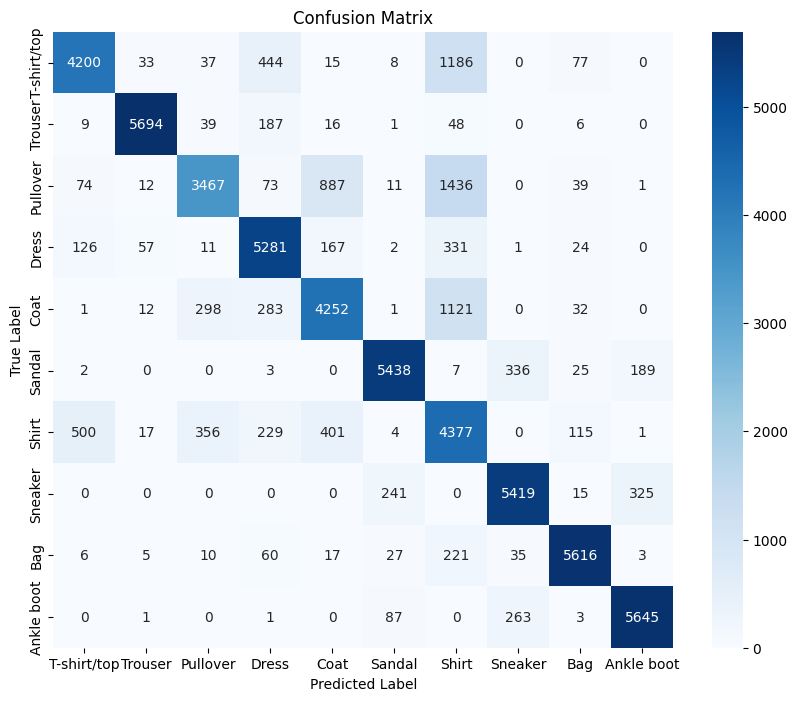

In [39]:
evaluate_model(model, test_loader, class_names)